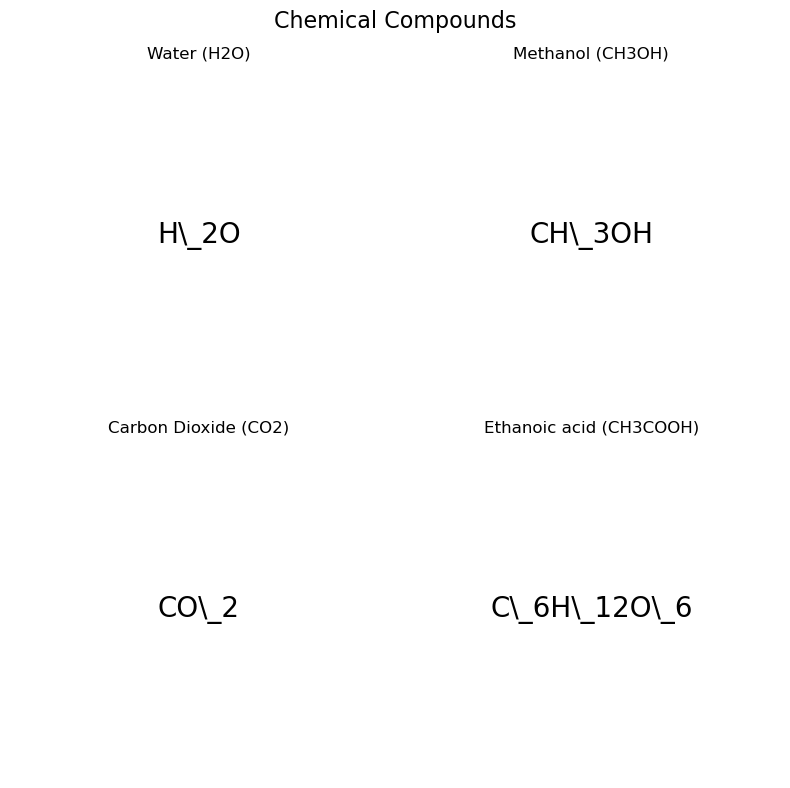

In [2]:
import matplotlib.pyplot as plt

def convert_to_raw_string(compound):
  """
  Converts a chemical compound string into a matplotlib raw string format.

  Args:
      compound: The chemical compound string.

  Returns:
      The converted raw string.
  """
  # Iterate over each character and escape subscripts and superscripts
  raw_string = ""
  for char in compound:
    if char in ["_", "^"]:
      raw_string += "\\" + char  # Escape with backslash
    else:
      raw_string += char
  return raw_string

# Example list of compounds (replace with your actual list)
compounds = ["H_2O", "CH_3OH", "CO_2", "C_6H_12O_6"]

# Loop through each compound and convert to raw string
raw_strings = []
for compound in compounds:
  raw_string = convert_to_raw_string(compound)
  raw_strings.append(raw_string)

# Example usage: Create a plot and add text with each raw string
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # Create a 2x2 subplot grid

# Loop through axes and raw strings to display compounds
row, col = 0, 0
for raw_string in raw_strings:
  axs[row, col].text(0.5, 0.5, raw_string, ha='center', va='center', fontsize=20)
  axs[row, col].axis('off')  # Hide axes for cleaner images
  col += 1
  if col > 1:
    row += 1
    col = 0

# Optional: Add titles or labels (adjust based on your needs)
fig.suptitle("Chemical Compounds", fontsize=16)
axs[0, 0].set_title("Water (H2O)")
axs[0, 1].set_title("Methanol (CH3OH)")
axs[1, 0].set_title("Carbon Dioxide (CO2)")
axs[1, 1].set_title("Ethanoic acid (CH3COOH)")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [10]:
import matplotlib

# Suppress generation of images (prevents attempting image output)
matplotlib.use('Agg')

def convert_to_raw_string(compound):
  """
  Converts a chemical compound string into a matplotlib raw string format.

  Args:
      compound: The chemical compound string.

  Returns:
      The converted raw string.
  """
  # Iterate over each character and add escapes for subscripts and superscripts
  raw_string = ""
  for char in compound:
    if char.isdigit():  # Check if character is a digit (assuming subscripts)
      raw_string += r"$_{" + char + r"}$"  # Escape for subscript with curly braces
    elif char in "+-":  # Check for plus or minus sign (assuming superscripts)
      raw_string += r"$^{" + char + r"}$"  # Escape for superscript with curly braces
    else:
      raw_string += char
  return raw_string

# Example compound (replace with your actual list)
compounds = ["Br3-", "BrO3−", "BO33-", "(CH3)2S+CH2CH2COO−"]

# Loop through each compound and convert to raw string
raw_strings = []
for compound in compounds:
  raw_string = convert_to_raw_string(compound)
  raw_strings.append(raw_string)

# Print the converted raw strings
print("Converted Raw Strings:")
for raw_string in raw_strings:
  print(raw_string)


Converted Raw Strings:
Br$_{3}$$^{-}$
BrO$_{3}$−
BO$_{3}$$_{3}$$^{-}$
(CH$_{3}$)$_{2}$S$^{+}$CH$_{2}$CH$_{2}$COO−


In [13]:
import matplotlib

# Suppress generation of images (prevents attempting image output)
matplotlib.use('Agg')

def convert_to_raw_string(compound):
  """
  Converts a chemical compound string into a matplotlib raw string format.

  Args:
      compound: The chemical compound string.

  Returns:
      The converted raw string.
  """
  # Iterate over each character and add escapes for subscripts and superscripts
  raw_string = ""
  prev_char_escaped = False  # Track previous character escaping state
  for char in compound:
    if char.isdigit() and not prev_char_escaped:  # Check if digit and not following escape
      raw_string += r"$_{" + char  # Start subscript escape
      prev_char_escaped = True  # Mark previous character as escaped
    elif char.isdigit() and prev_char_escaped:  # Consecutive digit (superscript)
      raw_string += char  # No additional escape needed for consecutive superscript
    elif char in "+-":  # Check for plus or minus sign (assuming superscripts)
      raw_string += r"$^{" + char + r"}$"  # Escape for superscript with curly braces
      if prev_char_escaped:  # Close subscript if digit before superscript sign
        raw_string += r"}$"
      prev_char_escaped = False  # Reset escape tracking for next character
    else:
      raw_string += char
      prev_char_escaped = False  # Reset escape tracking for next character
    if not char.isdigit():  # Close subscript escape if not a digit
      raw_string += r"}$" if prev_char_escaped else ""
      prev_char_escaped = False  # Reset escape tracking

  return raw_string

# Example compound
compound = "BO33-"

# Convert to raw string
raw_string = convert_to_raw_string(compound)

# Print the converted raw string
print("Converted Raw String:")
print(raw_string)


Converted Raw String:
BO$_{33$^{-}$}$
